<h1>Airline Review Sentiment - Classification Machine Learning project </h1>

Dataset Link: https://www.kaggle.com/datasets/juhibhojani/airline-reviews

<h3>Contents</h3>
<h3>
<ol>
    <li><b>Importing Libraries and Dataset</b></li>
    <li><b>Data Understanding</b></li>
    <li><b>Exploratory Data Analysis</b></li>
    <li><b>Sentiment Analysis and Feature Engineering</b></li>
    <li><b>Encoding the Dataset</b></li>
    <li><b>Impiuting the Null Values</b></li>
    <li><b>Feature Selection</b></li>
    <li><b>Balancing the Data</b></li>
    <li><b>Model building</b></li>
</ol>
</h3>
    

<h2>Importing Libraries and the Dataset</h2>

In [457]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
import xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, confusion_matrix, roc_curve
from sklearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier

In [213]:
nltk.download('vader_lexicon')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\manas\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\manas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [291]:
airlines_data = pd.read_csv('Airline_review.csv')

In [292]:
airlines_data.head(2)

,Unnamed: 0,Airline Name,Overall_Rating,Review_Title,Review Date,Verified,Review,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended
0,0,AB Aviation,9,"""pretty decent airline""",11th November 2019,True,Moroni to Moheli. Turned out to be a pretty ...,NaN,Solo Leisure,Economy Class,Moroni to Moheli,November 2019,4.0,5.0,4.0,4.0,NaN,NaN,3.0,yes
1,1,AB Aviation,1,"""Not a good airline""",25th June 2019,True,Moroni to Anjouan. It is a very small airline...,E120,Solo Leisure,Economy Class,Moroni to Anjouan,June 2019,2.0,2.0,1.0,1.0,NaN,NaN,2.0,no


In [293]:
airlines_data.shape

(23171, 20)

<h5>The data has 23,171 and 20 columns </h5>

<h2>2. Data Understanding</h2>

In [295]:
airlines_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23171 entries, 0 to 23170
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              23171 non-null  int64  
 1   Airline Name            23171 non-null  object 
 2   Overall_Rating          23171 non-null  object 
 3   Review_Title            23171 non-null  object 
 4   Review Date             23171 non-null  object 
 5   Verified                23171 non-null  bool   
 6   Review                  23171 non-null  object 
 7   Aircraft                7129 non-null   object 
 8   Type Of Traveller       19433 non-null  object 
 9   Seat Type               22075 non-null  object 
 10  Route                   19343 non-null  object 
 11  Date Flown              19417 non-null  object 
 12  Seat Comfort            19016 non-null  float64
 13  Cabin Staff Service     18911 non-null  float64
 14  Food & Beverages        14500 non-null

<ul>
    <li>There are 11 object type columns</li>
    <li>There are 8 numerical columns </li>
    <li>There is one Boolean Column </li>

In [296]:
airlines_data.describe()

,Unnamed: 0,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money
count,23171.00000,19016.000000,18911.000000,14500.000000,18378.000000,10829.000000,5920.000000,22105.000000
mean,11585.00000,2.618374,2.871609,2.553586,2.353738,2.179056,1.780405,2.451165
std,6689.03588,1.464840,1.604631,1.526314,1.595747,1.488839,1.318800,1.594155
min,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,5792.50000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,11585.00000,3.000000,3.000000,2.000000,1.000000,2.000000,1.000000,2.000000
75%,17377.50000,4.000000,4.000000,4.000000,4.000000,3.000000,2.000000,4.000000
max,23170.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [297]:
airlines_data.select_dtypes(include = 'object').describe()

,Airline Name,Overall_Rating,Review_Title,Review Date,Review,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Recommended
count,23171,23171,23171,23171,23171,7129,19433,22075,19343,19417,23171
unique,497,10,17219,4557,23046,1048,4,4,13607,109,2
top,Aeromexico,1,Onur Air customer review,16th July 2023,FRA-LUX in Y class. Short trip connecting in F...,A320,Solo Leisure,Economy Class,Melbourne to Sydney,June 2023,no
freq,100,11595,84,67,2,1041,7120,19145,43,1057,15364


<strong>Inferences</strong>
<ul>
    <li>Unnamed Column one is the ID Column of review</li>
    <li>Multiple Columns have missing values.</li>
    <li>Sentiment analysis must be performend on 'Review_Title' and 'Review' Columns.</li>
</ul>

In [298]:
#Checking Percentage of Null Values
(airlines_data.isnull().sum()/airlines_data.shape[0])*100

Unnamed: 0                 0.000000
Airline Name               0.000000
Overall_Rating             0.000000
Review_Title               0.000000
Review Date                0.000000
Verified                   0.000000
Review                     0.000000
Aircraft                  69.233093
Type Of Traveller         16.132234
Seat Type                  4.730050
Route                     16.520651
Date Flown                16.201286
Seat Comfort              17.931898
Cabin Staff Service       18.385050
Food & Beverages          37.421777
Ground Service            20.685339
Inflight Entertainment    53.264857
Wifi & Connectivity       74.450822
Value For Money            4.600578
Recommended                0.000000
dtype: float64

<strong>There are columns that have greater than 50% Null Values</strong>
<p>Since it would be tought to impute these values, the columns with above 50% null values will be dropped</p>
<p>Dropping Column one as well because it is an ID column and adds no information.</p>

In [299]:
airlines_data.drop(columns = ['Unnamed: 0','Aircraft','Inflight Entertainment','Wifi & Connectivity'], inplace = True)

In [300]:
airlines_data.duplicated().sum() 

120

<p>There appear to be 27 rows that are complete duplicates of another row. These rows must be dropped.</p>

In [301]:
airlines_data.drop_duplicates(inplace=True)

<h2>3.Exploratory Data Analysis</h2>

In [302]:
#Column by Column
#Column : Airline Name
airlines_data['Airline Name'].value_counts().head(20)

Frontier Airlines            100
Jet Airways                  100
SilkAir                      100
Royal Air Maroc              100
Allegiant Air                100
Garuda Indonesia             100
Korean Air                   100
Lufthansa                    100
Virgin America               100
Lynx Air                     100
Ethiopian Airlines           100
AirAsia India                100
British Airways              100
Air Tahiti Nui               100
Aeroflot Russian Airlines    100
Volaris                      100
Spirit Airlines              100
LOT Polish Airlines          100
Go First                     100
Jetstar Pacific              100
Name: Airline Name, dtype: int64

The dataset appears to be imalanced. We will understand the distribution on the number of times an airline occurs

In [303]:
pd.Series(airlines_data['Airline Name'].value_counts().values).value_counts().head(10)

100    154
1       42
2       32
4       22
3       20
7       12
5       10
9       10
13       8
14       8
dtype: int64

<b>Inferences</b>
<p>There appear to be some airplines that have occured only a handfull of times. (1-6) Since these total upto less than 150, all the airlines with less that 10 Occurances will be renames to 'Miscellaneous' inorder to avoid the hamperance they would have otherwise caused.<p>

In [304]:
temp = airlines_data['Airline Name'].value_counts()
flights_to_rename = np.array(temp[temp < 10].index)
len(flights_to_rename)

157

In [305]:
airlines_data['Airline Name'].value_counts()

Frontier Airlines          100
Jet Airways                100
SilkAir                    100
Royal Air Maroc            100
Allegiant Air              100
                          ... 
TransNusa                    1
NextJet                      1
MEGA Maldives Airlines       1
Manta Air                    1
Cambodia Bayon Airlines      1
Name: Airline Name, Length: 497, dtype: int64

<strong>Doing this will help when we Encode this data in the future. We will reduce the overall dimensionality of this column</strong>

In [306]:
flights_to_rename[:5]

array(['Air KBZ', 'Thomas Cook Airlines Scandinavia',
       'Africa World Airlines', 'TAR Aerolineas', 'Ravn Alaska'],
      dtype=object)

In [307]:
airlines_data.replace(flights_to_rename, 'Miscellaneuous', inplace=True)

In [308]:
#overall rating column
airlines_data['Overall_Rating'].value_counts()

1    11587
2     2294
9     1768
8     1756
3     1353
7     1193
4      853
5      826
n      749
6      672
Name: Overall_Rating, dtype: int64

<p>There appears to be an entry of 'n' where all data should ideally be numeric</p>
<b>Identifying and correccting this error</b>

In [309]:
airlines_data[airlines_data['Overall_Rating'] == 'n'].iloc[0]

Airline Name                                               Adria Airways
Overall_Rating                                                         n
Review_Title                               Adria Airways customer review
Review Date                                             4th October 2007
Verified                                                           False
Review                 BRU-LJU-BRU. Outward flight on a CRJ200 very n...
Type Of Traveller                                                    NaN
Seat Type                                                            NaN
Route                                                                NaN
Date Flown                                                           NaN
Seat Comfort                                                         NaN
Cabin Staff Service                                                  NaN
Food & Beverages                                                     NaN
Ground Service                                     

It appears that 'n' appears whenever the review is not verifiied and/or the data fron other columns is missing.
Let us confirm this by reviewing other columns where the value in 'Overall_Rating' is 'n'.

In [310]:
(airlines_data[airlines_data['Overall_Rating'] == 'n'].isnull().sum()/airlines_data[airlines_data['Overall_Rating'] == 'n'].shape[0])*100

Airline Name             0.000000
Overall_Rating           0.000000
Review_Title             0.000000
Review Date              0.000000
Verified                 0.000000
Review                   0.000000
Type Of Traveller      100.000000
Seat Type               58.210948
Route                  100.000000
Date Flown             100.000000
Seat Comfort            76.368491
Cabin Staff Service     76.368491
Food & Beverages        76.368491
Ground Service         100.000000
Value For Money         57.810414
Recommended              0.000000
dtype: float64

In [311]:
airlines_data[airlines_data['Overall_Rating'] == 'n']['Verified'].value_counts()

False    749
Name: Verified, dtype: int64

In [312]:
airlines_data['Verified'].value_counts()

True     12319
False    10732
Name: Verified, dtype: int64

In [313]:
(airlines_data[airlines_data['Overall_Rating'] == 'n'].isnull().sum()/airlines_data.isnull().sum())*100

Airline Name                 NaN
Overall_Rating               NaN
Review_Title                 NaN
Review Date                  NaN
Verified                     NaN
Review                       NaN
Type Of Traveller      20.650675
Seat Type              44.084934
Route                  20.156082
Date Flown             20.565623
Seat Comfort           14.144411
Cabin Staff Service    13.786455
Food & Beverages        6.686148
Ground Service         15.997437
Value For Money        45.151199
Recommended                  NaN
dtype: float64

In [314]:
airlines_data.shape

(23051, 16)

<b>Inferences</b>
<p>It can be inferred that data graines that have an Overall_Rating of 'n' have higher amounts of Null values in their correspoding row entries.</p>
<p>This could signify that these entries are not completely valid and have be errantly entered.</p>
<p>Given this, it is best to drop rows with this error.</p>

In [315]:
airlines_data.drop(index = airlines_data[airlines_data['Overall_Rating'] == 'n'].index, inplace=True)

In [316]:
(airlines_data.isnull().sum()/airlines_data.shape[0])*100

Airline Name            0.000000
Overall_Rating          0.000000
Review_Title            0.000000
Review Date             0.000000
Verified                0.000000
Review                  0.000000
Type Of Traveller      12.904672
Seat Type               2.479598
Route                  13.303740
Date Flown             12.971931
Seat Comfort           15.568110
Cabin Staff Service    16.038920
Food & Beverages       35.794996
Ground Service         17.635190
Value For Money         2.358533
Recommended             0.000000
dtype: float64

In [317]:
airlines_data.shape

(22302, 16)

Significantly Lower number of Null Values in the Dataset, with a very small sacrifice on information loss.

<AxesSubplot:>

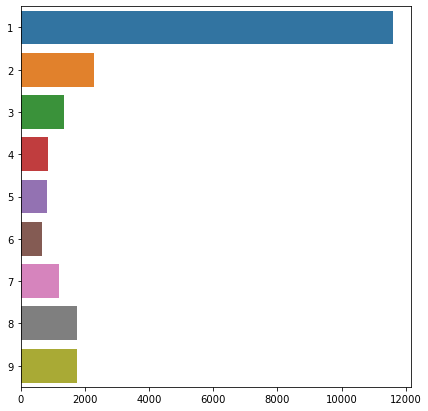

In [318]:
temp = airlines_data['Overall_Rating'].value_counts().sort_index()
plt.figure(figsize=(7,7))
sns.barplot(y = temp.index, x = temp.values)

<b>Most of the overall reviews appear to be '1' or a largely Negative Review.<b>

In [319]:
#Column 'Review_Title'
type(airlines_data['Review_Title'][0])

str

In [320]:
airlines_data['Review_Title'].duplicated().sum()

5085

In [321]:
airlines_data['Review'].duplicated().sum()

4

<b>Inferences</b>

Although there appear to be 5085 rows of data where the review title is duplicated, there are very few duplicated reviews, which means there are no double entires.

In [322]:
airlines_data['Review_Title'].value_counts().head(30)

Onur Air customer review              67
CityJet customer review               65
Germanwings customer review           65
US Airways customer review            60
Dragonair customer review             60
TAM Airlines customer review          59
Meridiana customer review             55
Olympic Air customer review           55
Cubana Airlines customer review       52
Shanghai Airlines customer review     50
Croatia Airlines customer review      49
Transaero Airlines customer review    49
QantasLink customer review            49
Openskies customer review             48
LAN Airlines customer review          46
Air Namibia customer review           45
Air Tahiti Nui customer review        45
Lao Skyway customer review            43
Bulgaria Air customer review          43
Firefly customer review               41
Air Dolomiti customer review          40
"Worst airline ever"                  40
Eastern Airways customer review       40
Caribbean Airlines customer review    39
Phuket Air custo

The reason for the duplication in the column appears to be because of the Generalized review title format that the airlines and reporting gateway company seem to follow.

We will have to keep this is mind when performing Sentiment Analysis on this column.

In [323]:
#Review Data Column
type(airlines_data['Review Date'][0])

str

In [324]:
def date_convertor(x):
    try: 
        return datetime.datetime.strptime(x,'%dth %B %Y')
    except:
        try:            
            return datetime.datetime.strptime(x,'%drd %B %Y')
        except:
            try:
                return datetime.datetime.strptime(x,'%dst %B %Y')
            except:
                return datetime.datetime.strptime(x,'%dnd %B %Y')
                

In [325]:
airlines_data['Review Date']=airlines_data['Review Date'].apply(date_convertor)

In [326]:
airlines_data['Review Date'][0].dayofweek, airlines_data['Review Date'][0].day_name()

(0, 'Monday')

<strong>We can now use this datetime column to generate more relevant features when in our Feature Engineering section of the project.</strong>

In [327]:
airlines_data['Verified'].value_counts(normalize=True)*100

True     55.237198
False    44.762802
Name: Verified, dtype: float64

Around 55% of the reviews in this dataset appear to be Verified, where as the rest do not. We will explore more of this when we generate correlation plots and heatmaps from this dataset in the Data Visualization Section of this course.

In [328]:
airlines_data['Review'].head()

0      Moroni to Moheli. Turned out to be a pretty ...
1     Moroni to Anjouan. It is a very small airline...
2      Anjouan to Dzaoudzi. A very small airline an...
3      Please do a favor yourself and do not fly wi...
4     Do not book a flight with this airline! My fr...
Name: Review, dtype: object

The reviews column has text. Let us analyse how long the text is and wheather there are any duplicates

In [329]:
airlines_data['Review'].duplicated().sum()

4

Since there are only 4 duplicates we can keep them. They can be attributed to a general filler review.

In [330]:
len(airlines_data['Review'][0])

352

In [331]:
airlines_data['Review'].tail()

23166     Bangkok to Tokyo. I’ve flown many low cost ai...
23167      Avoid at all costs. I booked flights to go f...
23168      Flight was leaving at 23.15 and after an hou...
23169     Zipair is JAL’s budget airline. They don’t ha...
23170      They lied about connection in Narita and we ...
Name: Review, dtype: object

Appropriate Stemming, followed by Sentiment Analysis must be done on this column at the time of Feature Engineering.

<BarContainer object of 4 artists>

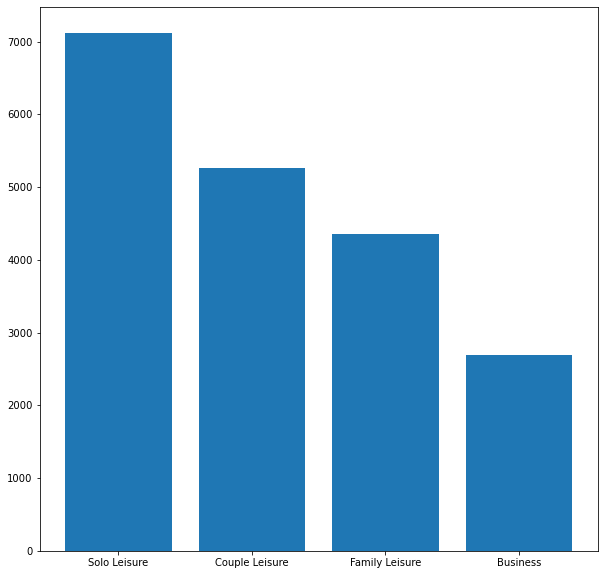

In [332]:
plt.figure(figsize = (10,10))
plt.bar(x = airlines_data['Type Of Traveller'].value_counts().index, height = airlines_data['Type Of Traveller'].value_counts().values)

There appear to be the most number of travellers in the Solo Leasure Column.

<AxesSubplot:xlabel='Type Of Traveller', ylabel='count'>

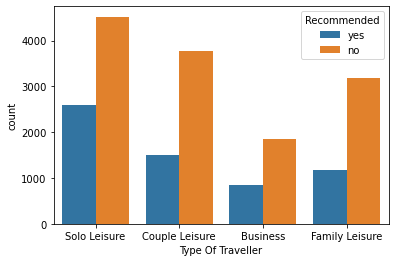

In [333]:
sns.countplot(airlines_data['Type Of Traveller'], hue=airlines_data['Recommended'])

In [334]:
airlines_data.columns

Index(['Airline Name', 'Overall_Rating', 'Review_Title', 'Review Date',
       'Verified', 'Review', 'Type Of Traveller', 'Seat Type', 'Route',
       'Date Flown', 'Seat Comfort', 'Cabin Staff Service', 'Food & Beverages',
       'Ground Service', 'Value For Money', 'Recommended'],
      dtype='object')

In [335]:
airlines_data.drop(columns='Route', inplace = True)

We dropped the routes column as it has a high number of categories. This would prove difficult at the time of encoding and be an overall hinderance to our final model.

In [336]:
categorical_columns = airlines_data.select_dtypes(include = 'object')
for i in categorical_columns:
    print(f"The column {i} has : {airlines_data[i].nunique()} unique Values")

The column Airline Name has : 341 unique Values
The column Overall_Rating has : 9 unique Values
The column Review_Title has : 17217 unique Values
The column Review has : 22298 unique Values
The column Type Of Traveller has : 4 unique Values
The column Seat Type has : 4 unique Values
The column Date Flown has : 109 unique Values
The column Recommended has : 2 unique Values


In [337]:
airlines_data['Date Flown'].head(2)

0    November 2019
1        June 2019
Name: Date Flown, dtype: object

In [338]:
def date_flown_converter(x):
    try:
        return datetime.datetime.strptime(x,'%B %Y')
    except:
        return np.nan

In [339]:
airlines_data['Date Flown'] = airlines_data['Date Flown'].apply(date_flown_converter)

In [340]:
airlines_data['Date Flown'][0]

Timestamp('2019-11-01 00:00:00')

We now have usefull data of when the flight was flown and how it was flown

<h3>3.1
    Data Visualizations</h3>

<AxesSubplot:xlabel='Overall_Rating', ylabel='count'>

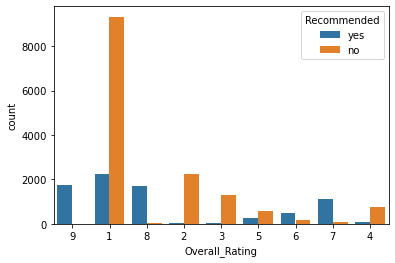

In [341]:
sns.countplot(airlines_data['Overall_Rating'],hue=airlines_data['Recommended'])

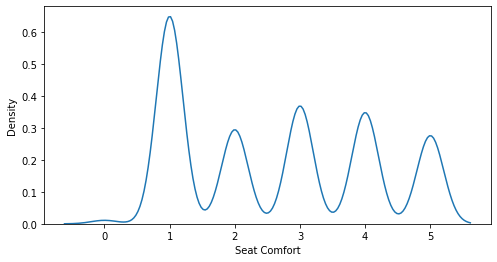

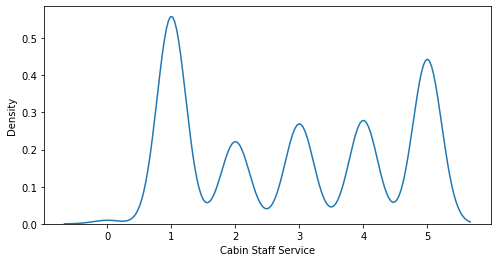

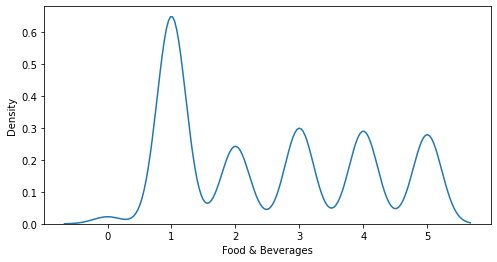

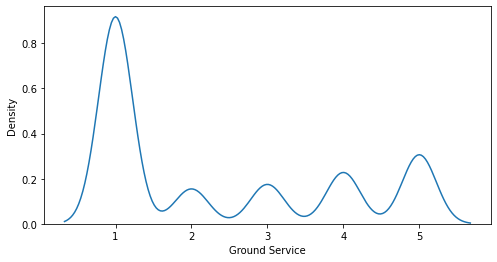

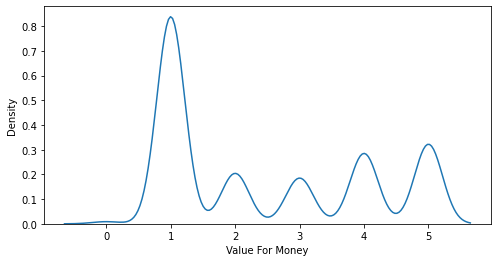

In [342]:
numerical_columns = airlines_data.select_dtypes(include='number').columns
for col in numerical_columns:
    plt.figure(figsize = (8,4))
    sns.kdeplot(airlines_data[col])
    plt.show()

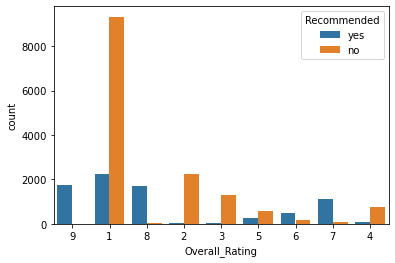

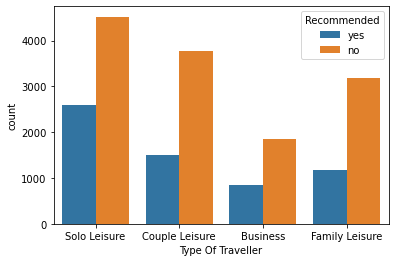

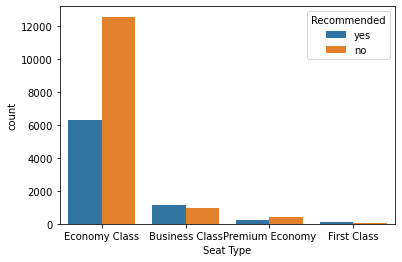

In [343]:
categorical_columns = airlines_data.select_dtypes(include='object').columns
for col in categorical_columns:
    if airlines_data[col].nunique()>50 or col == 'Recommended':
        continue
    else:
        
        sns.countplot(airlines_data[col], hue = airlines_data['Recommended'])
        plt.show()

<AxesSubplot:>

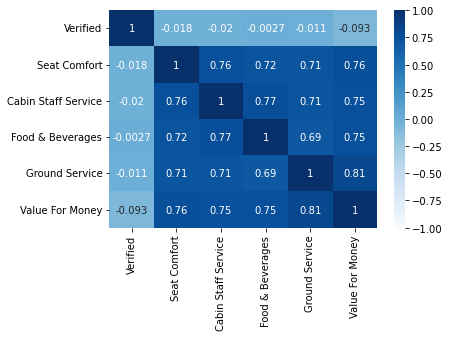

In [344]:
sns.heatmap(airlines_data.corr(), vmin = -1, vmax = 1, annot = True, cmap='Blues')

<strong>Inferences</strong>
<ul>
    <li>Overall Rating - as obivous indicates the most number of 'Non Recommnderors' to those that have a lower overall rating.</li>
    <li>A higher percentage of people flying from economy class have chosen not to recommend the flight to others.</li>
    <li>There appears to be high multi-collinearity in the dataset. We will re-examine this issue after feature engineering.</li>

In [345]:
airlines_data['Recommended'].value_counts()

no     14506
yes     7796
Name: Recommended, dtype: int64

The data appears to be imbalanced. We might have to employ oversampling or undersampling techniques to balance the dataset.

<h3>3.Sentiment analysis and Feature Engineering</h3>

In [279]:
airlines_data.columns

Index(['Airline Name', 'Overall_Rating', 'Review_Title', 'Review Date',
       'Verified', 'Review', 'Type Of Traveller', 'Seat Type', 'Date Flown',
       'Seat Comfort', 'Cabin Staff Service', 'Food & Beverages',
       'Ground Service', 'Value For Money', 'Recommended'],
      dtype='object')

The two Columns that require sentiment analysism are:
<ol>
    <li>Review Title</li>
    <li>Review</li>

In [280]:
#defining a sentiment analysis function
def sentiment_analyser(sentiment_text):
    temp = sentiment_text.lower().strip()
    temp = temp.translate(str.maketrans('','', string.punctuation))
    score = SentimentIntensityAnalyzer().polarity_scores(temp)
    return score

In [281]:
#Dummy Check
print(sentiment_analyser('My name is Manas!. I love being happy and Joyfull'))

{'neg': 0.0, 'neu': 0.47, 'pos': 0.53, 'compound': 0.836}


In [148]:
airlines_data['Review_Title_Sentiment']=airlines_data['Review_Title'].apply(sentiment_analyser)

In [149]:
airlines_data['Review_sentiment'] = airlines_data['Review'].apply(sentiment_analyser)

In [354]:
airlines_data.head(2)

,Airline Name,Overall_Rating,Review_Title,Review Date,Verified,Review,Type Of Traveller,Seat Type,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Value For Money,Recommended,Review_Title_Sentiment,Review_sentiment
0,Miscellaneuous,9,"""pretty decent airline""",2019-11-11,True,Moroni to Moheli. Turned out to be a pretty ...,Solo Leisure,Economy Class,2019-11-01,4.0,5.0,4.0,4.0,3.0,yes,"{'neg': 0.0, 'neu': 0.385, 'pos': 0.615, 'comp...","{'neg': 0.0, 'neu': 0.782, 'pos': 0.218, 'comp..."
1,Miscellaneuous,1,"""Not a good airline""",2019-06-25,True,Moroni to Anjouan. It is a very small airline...,Solo Leisure,Economy Class,2019-06-01,2.0,2.0,1.0,1.0,2.0,no,"{'neg': 0.546, 'neu': 0.454, 'pos': 0.0, 'comp...","{'neg': 0.114, 'neu': 0.878, 'pos': 0.008, 'co..."


In [355]:
#saving the csv inorder to not lose data
airlines_data.to_pickle("Post_sentiment.pkl")

__________________________________________________________________________________________________________________

In [367]:
airlines_data = pd.read_pickle('Post_sentiment.pkl')

In [368]:
airlines_data[['Review_Title_Sentiment','Review_sentiment']].head(3)

,Review_Title_Sentiment,Review_sentiment
0,"{'neg': 0.0, 'neu': 0.385, 'pos': 0.615, 'comp...","{'neg': 0.0, 'neu': 0.782, 'pos': 0.218, 'comp..."
1,"{'neg': 0.546, 'neu': 0.454, 'pos': 0.0, 'comp...","{'neg': 0.114, 'neu': 0.878, 'pos': 0.008, 'co..."
2,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'neg': 0.031, 'neu': 0.852, 'pos': 0.117, 'co..."


Creating 8 different columns for all the 4 keys from both of the dictionaries. We will then drop the two extra columns

In [369]:
#Review_Title_Sentiment first
review_title_temp = []
for entry in airlines_data['Review_Title_Sentiment']:
    review_title_temp.append([entry['neg'], entry['neu'], entry['pos'], entry['compound']])
review_title_temp = np.array(review_title_temp)
airlines_data['Review_Title_Negative'] = review_title_temp[:,0]
airlines_data['Review_Title_Neutral'] = review_title_temp[:,1]
airlines_data['Review_Title_Positive'] = review_title_temp[:,2]
airlines_data['Review_Title_Compound'] = review_title_temp[:,3]

In [370]:
airlines_data.head(2)

,Airline Name,Overall_Rating,Review_Title,Review Date,Verified,Review,Type Of Traveller,Seat Type,Date Flown,Seat Comfort,...,Food & Beverages,Ground Service,Value For Money,Recommended,Review_Title_Sentiment,Review_sentiment,Review_Title_Negative,Review_Title_Neutral,Review_Title_Positive,Review_Title_Compound
0,Miscellaneuous,9,"""pretty decent airline""",2019-11-11,True,Moroni to Moheli. Turned out to be a pretty ...,Solo Leisure,Economy Class,2019-11-01,4.0,...,4.0,4.0,3.0,yes,"{'neg': 0.0, 'neu': 0.385, 'pos': 0.615, 'comp...","{'neg': 0.0, 'neu': 0.782, 'pos': 0.218, 'comp...",0.000,0.385,0.615,0.4939
1,Miscellaneuous,1,"""Not a good airline""",2019-06-25,True,Moroni to Anjouan. It is a very small airline...,Solo Leisure,Economy Class,2019-06-01,2.0,...,1.0,1.0,2.0,no,"{'neg': 0.546, 'neu': 0.454, 'pos': 0.0, 'comp...","{'neg': 0.114, 'neu': 0.878, 'pos': 0.008, 'co...",0.546,0.454,0.000,-0.3412


In [371]:
#Doing this for the review column
review_temp = []
for entry in airlines_data['Review_sentiment']:
    review_temp.append([entry['neg'], entry['neu'], entry['pos'], entry['compound']])
review_temp = np.array(review_temp)
airlines_data['Review_Negative'] = review_temp[:,0]
airlines_data['Review_Neutral'] = review_temp[:,1]
airlines_data['Review_Positive'] = review_temp[:,2]
airlines_data['Review_Compound'] = review_temp[:,3]

In [372]:
airlines_data.head(2)

,Airline Name,Overall_Rating,Review_Title,Review Date,Verified,Review,Type Of Traveller,Seat Type,Date Flown,Seat Comfort,...,Review_Title_Sentiment,Review_sentiment,Review_Title_Negative,Review_Title_Neutral,Review_Title_Positive,Review_Title_Compound,Review_Negative,Review_Neutral,Review_Positive,Review_Compound
0,Miscellaneuous,9,"""pretty decent airline""",2019-11-11,True,Moroni to Moheli. Turned out to be a pretty ...,Solo Leisure,Economy Class,2019-11-01,4.0,...,"{'neg': 0.0, 'neu': 0.385, 'pos': 0.615, 'comp...","{'neg': 0.0, 'neu': 0.782, 'pos': 0.218, 'comp...",0.000,0.385,0.615,0.4939,0.000,0.782,0.218,0.9192
1,Miscellaneuous,1,"""Not a good airline""",2019-06-25,True,Moroni to Anjouan. It is a very small airline...,Solo Leisure,Economy Class,2019-06-01,2.0,...,"{'neg': 0.546, 'neu': 0.454, 'pos': 0.0, 'comp...","{'neg': 0.114, 'neu': 0.878, 'pos': 0.008, 'co...",0.546,0.454,0.000,-0.3412,0.114,0.878,0.008,-0.9242


In [373]:
#dropping the uncessary columns
airlines_data.drop(columns = ['Review_Title','Review','Review_Title_Sentiment','Review_sentiment'], inplace=True)

In [374]:
airlines_data.head(2)

,Airline Name,Overall_Rating,Review Date,Verified,Type Of Traveller,Seat Type,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,...,Value For Money,Recommended,Review_Title_Negative,Review_Title_Neutral,Review_Title_Positive,Review_Title_Compound,Review_Negative,Review_Neutral,Review_Positive,Review_Compound
0,Miscellaneuous,9,2019-11-11,True,Solo Leisure,Economy Class,2019-11-01,4.0,5.0,4.0,...,3.0,yes,0.000,0.385,0.615,0.4939,0.000,0.782,0.218,0.9192
1,Miscellaneuous,1,2019-06-25,True,Solo Leisure,Economy Class,2019-06-01,2.0,2.0,1.0,...,2.0,no,0.546,0.454,0.000,-0.3412,0.114,0.878,0.008,-0.9242


In [375]:
#Generating more accurate Review Timing Data
airlines_data['Review_Month']= airlines_data['Review Date'].apply(lambda x : x.month)
airlines_data['Review_Day']= airlines_data['Review Date'].apply(lambda x : x.day)
airlines_data['Review_Year']= airlines_data['Review Date'].apply(lambda x : x.year)

In [376]:
airlines_data['Flight_Month'] = airlines_data['Date Flown'].apply(lambda x : x.month)
airlines_data['Flight_Year'] = airlines_data['Date Flown'].apply(lambda x : x.year)

In [377]:
airlines_data.head(2)

,Airline Name,Overall_Rating,Review Date,Verified,Type Of Traveller,Seat Type,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,...,Review_Title_Compound,Review_Negative,Review_Neutral,Review_Positive,Review_Compound,Review_Month,Review_Day,Review_Year,Flight_Month,Flight_Year
0,Miscellaneuous,9,2019-11-11,True,Solo Leisure,Economy Class,2019-11-01,4.0,5.0,4.0,...,0.4939,0.000,0.782,0.218,0.9192,11,11,2019,11.0,2019.0
1,Miscellaneuous,1,2019-06-25,True,Solo Leisure,Economy Class,2019-06-01,2.0,2.0,1.0,...,-0.3412,0.114,0.878,0.008,-0.9242,6,25,2019,6.0,2019.0


In [382]:
airlines_data.drop(columns = ['Review Date','Date Flown'], inplace = True)

<h3>Encoding the relevant columns</h3>

In [383]:
le = LabelEncoder()
airlines_data['Airline Name'] = le.fit_transform(airlines_data['Airline Name'])
airlines_data['Verified'] = le.fit_transform(airlines_data['Verified'])
airlines_data['Type Of Traveller'] = le.fit_transform(airlines_data['Type Of Traveller'])
airlines_data['Seat Type'] = le.fit_transform(airlines_data['Seat Type'])

In [384]:
airlines_data.head()

,Airline Name,Overall_Rating,Verified,Type Of Traveller,Seat Type,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Value For Money,...,Review_Title_Compound,Review_Negative,Review_Neutral,Review_Positive,Review_Compound,Review_Month,Review_Day,Review_Year,Flight_Month,Flight_Year
0,206,9,1,3,1,4.0,5.0,4.0,4.0,3.0,...,0.4939,0.000,0.782,0.218,0.9192,11,11,2019,11.0,2019.0
1,206,1,1,3,1,2.0,2.0,1.0,1.0,2.0,...,-0.3412,0.114,0.878,0.008,-0.9242,6,25,2019,6.0,2019.0
2,206,1,1,3,1,2.0,1.0,1.0,1.0,2.0,...,0.0000,0.031,0.852,0.117,0.7346,6,25,2019,6.0,2019.0
3,2,1,0,3,1,1.0,1.0,NaN,1.0,1.0,...,0.0000,0.191,0.772,0.037,-0.9583,9,28,2019,9.0,2019.0
4,2,1,1,1,1,1.0,1.0,1.0,1.0,1.0,...,-0.1280,0.077,0.848,0.075,-0.0675,9,24,2019,9.0,2019.0


In [391]:
airlines_data['Overall_Rating'] = airlines_data['Overall_Rating'].apply(lambda x : int(x))

In [395]:
airlines_data['Recommended'].value_counts()

no     14506
yes     7796
Name: Recommended, dtype: int64

In [397]:
dep_dict = {'no':0,'yes':1}
airlines_data['Recommended']=airlines_data['Recommended'].map(dep_dict)

<h3>Handling Null Values</h3>

In [398]:
airlines_data.isnull().sum()

Airline Name                0
Overall_Rating              0
Verified                    0
Type Of Traveller           0
Seat Type                   0
Seat Comfort             3472
Cabin Staff Service      3577
Food & Beverages         7983
Ground Service           3933
Value For Money           526
Recommended                 0
Review_Title_Negative       0
Review_Title_Neutral        0
Review_Title_Positive       0
Review_Title_Compound       0
Review_Negative             0
Review_Neutral              0
Review_Positive             0
Review_Compound             0
Review_Month                0
Review_Day                  0
Review_Year                 0
Flight_Month             2893
Flight_Year              2893
dtype: int64

Our data very clearly has a lot of Null Values. We can impute these using a Simply Imputer but that would lead to an errant information inference. We thus use KNN Imputer to do the job for us.

KNN imputer will use 9 closest neaighbours without NULL values for every null value and choose the ones most highly represented by our data. This will give us a clearer and more accurate representation of NULL Values.

In [402]:
k = KNNImputer()
cols = airlines_data.columns
temp = pd.DataFrame(k.fit_transform(airlines_data), columns=cols)

In [403]:
temp.describe()

,Airline Name,Overall_Rating,Verified,Type Of Traveller,Seat Type,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Value For Money,...,Review_Title_Compound,Review_Negative,Review_Neutral,Review_Positive,Review_Compound,Review_Month,Review_Day,Review_Year,Flight_Month,Flight_Year
count,22302.000000,22302.000000,22302.000000,22302.000000,22302.000000,22302.000000,22302.000000,22302.000000,22302.000000,22302.000000,...,22302.000000,22302.000000,22302.000000,22302.000000,22302.000000,22302.000000,22302.000000,22302.000000,22302.000000,22302.000000
mean,171.177294,3.144068,0.552372,2.099632,1.047485,2.587768,2.835145,2.375948,2.388252,2.482863,...,-0.037149,0.088315,0.808128,0.103554,-0.011469,6.329029,15.707515,2019.204825,6.462057,2019.707129
std,96.811172,2.880363,0.497261,1.242792,0.661981,1.401056,1.533431,1.383398,1.533103,1.583134,...,0.375293,0.066593,0.083815,0.092828,0.779030,3.323355,8.798475,3.844801,3.209121,2.764272
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,-0.915800,0.000000,0.351000,0.000000,-0.998700,1.000000,1.000000,2003.000000,1.000000,2012.000000
25%,91.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,-0.318200,0.039000,0.759000,0.036000,-0.817600,4.000000,8.000000,2017.000000,4.000000,2017.000000
50%,170.000000,1.000000,1.000000,2.000000,1.000000,2.400000,3.000000,2.000000,2.000000,2.000000,...,0.000000,0.080000,0.819000,0.076000,-0.128000,6.000000,16.000000,2020.000000,6.100000,2020.000000
75%,253.000000,5.000000,1.000000,3.000000,1.000000,4.000000,4.000000,3.400000,4.000000,4.000000,...,0.000000,0.125000,0.868000,0.150000,0.865500,9.000000,23.000000,2022.000000,9.000000,2022.000000
max,340.000000,9.000000,1.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,0.877700,0.562000,1.000000,0.624000,0.999200,12.000000,31.000000,2023.000000,12.000000,2023.000000


In [404]:
airlines_data.describe()

,Airline Name,Overall_Rating,Verified,Type Of Traveller,Seat Type,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Value For Money,...,Review_Title_Compound,Review_Negative,Review_Neutral,Review_Positive,Review_Compound,Review_Month,Review_Day,Review_Year,Flight_Month,Flight_Year
count,22302.000000,22302.000000,22302.000000,22302.000000,22302.000000,18830.000000,18725.000000,14319.000000,18369.000000,21776.000000,...,22302.000000,22302.000000,22302.000000,22302.000000,22302.000000,22302.000000,22302.000000,22302.000000,19409.000000,19409.000000
mean,171.177294,3.144068,0.552372,2.099632,1.047485,2.627403,2.886195,2.573713,2.353911,2.469783,...,-0.037149,0.088315,0.808128,0.103554,-0.011469,6.329029,15.707515,2019.204825,6.419857,2020.262713
std,96.811172,2.880363,0.497261,1.242792,0.661981,1.463487,1.602086,1.520589,1.595846,1.595201,...,0.375293,0.066593,0.083815,0.092828,0.779030,3.323355,8.798475,3.844801,3.337575,2.513498
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,-0.915800,0.000000,0.351000,0.000000,-0.998700,1.000000,1.000000,2003.000000,1.000000,2012.000000
25%,91.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,-0.318200,0.039000,0.759000,0.036000,-0.817600,4.000000,8.000000,2017.000000,4.000000,2018.000000
50%,170.000000,1.000000,1.000000,2.000000,1.000000,3.000000,3.000000,2.000000,1.000000,2.000000,...,0.000000,0.080000,0.819000,0.076000,-0.128000,6.000000,16.000000,2020.000000,6.000000,2021.000000
75%,253.000000,5.000000,1.000000,3.000000,1.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,0.000000,0.125000,0.868000,0.150000,0.865500,9.000000,23.000000,2022.000000,9.000000,2023.000000
max,340.000000,9.000000,1.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,0.877700,0.562000,1.000000,0.624000,0.999200,12.000000,31.000000,2023.000000,12.000000,2023.000000


In [405]:
temp.isnull().sum()

Airline Name             0
Overall_Rating           0
Verified                 0
Type Of Traveller        0
Seat Type                0
Seat Comfort             0
Cabin Staff Service      0
Food & Beverages         0
Ground Service           0
Value For Money          0
Recommended              0
Review_Title_Negative    0
Review_Title_Neutral     0
Review_Title_Positive    0
Review_Title_Compound    0
Review_Negative          0
Review_Neutral           0
Review_Positive          0
Review_Compound          0
Review_Month             0
Review_Day               0
Review_Year              0
Flight_Month             0
Flight_Year              0
dtype: int64

The alogirthm seems to have done it's jpb. As we can see the newly imputed data is statistically very similar to the old dataset and has no null values.

We can now successfully re-assign the original dataset to the new dataset.

In [406]:
airlines_data = temp.copy()

In [407]:
airlines_data.head()

,Airline Name,Overall_Rating,Verified,Type Of Traveller,Seat Type,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Value For Money,...,Review_Title_Compound,Review_Negative,Review_Neutral,Review_Positive,Review_Compound,Review_Month,Review_Day,Review_Year,Flight_Month,Flight_Year
0,206.0,9.0,1.0,3.0,1.0,4.0,5.0,4.0,4.0,3.0,...,0.4939,0.000,0.782,0.218,0.9192,11.0,11.0,2019.0,11.0,2019.0
1,206.0,1.0,1.0,3.0,1.0,2.0,2.0,1.0,1.0,2.0,...,-0.3412,0.114,0.878,0.008,-0.9242,6.0,25.0,2019.0,6.0,2019.0
2,206.0,1.0,1.0,3.0,1.0,2.0,1.0,1.0,1.0,2.0,...,0.0000,0.031,0.852,0.117,0.7346,6.0,25.0,2019.0,6.0,2019.0
3,2.0,1.0,0.0,3.0,1.0,1.0,1.0,1.6,1.0,1.0,...,0.0000,0.191,0.772,0.037,-0.9583,9.0,28.0,2019.0,9.0,2019.0
4,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-0.1280,0.077,0.848,0.075,-0.0675,9.0,24.0,2019.0,9.0,2019.0


In [408]:
airlines_data.to_pickle('Post_Encoding.pkl')

<b>Saving the dataset in order to not lose progress.

_______________________________________________________________________________________________________________________________

In [409]:
airlines_data = pd.read_pickle('Post_Encoding.pkl')

In [412]:
airlines_data.columns

Index(['Airline Name', 'Overall_Rating', 'Verified', 'Type Of Traveller',
       'Seat Type', 'Seat Comfort', 'Cabin Staff Service', 'Food & Beverages',
       'Ground Service', 'Value For Money', 'Recommended',
       'Review_Title_Negative', 'Review_Title_Neutral',
       'Review_Title_Positive', 'Review_Title_Compound', 'Review_Negative',
       'Review_Neutral', 'Review_Positive', 'Review_Compound', 'Review_Month',
       'Review_Day', 'Review_Year', 'Flight_Month', 'Flight_Year'],
      dtype='object')

<h3>Feature Selection</h3>

<AxesSubplot:>

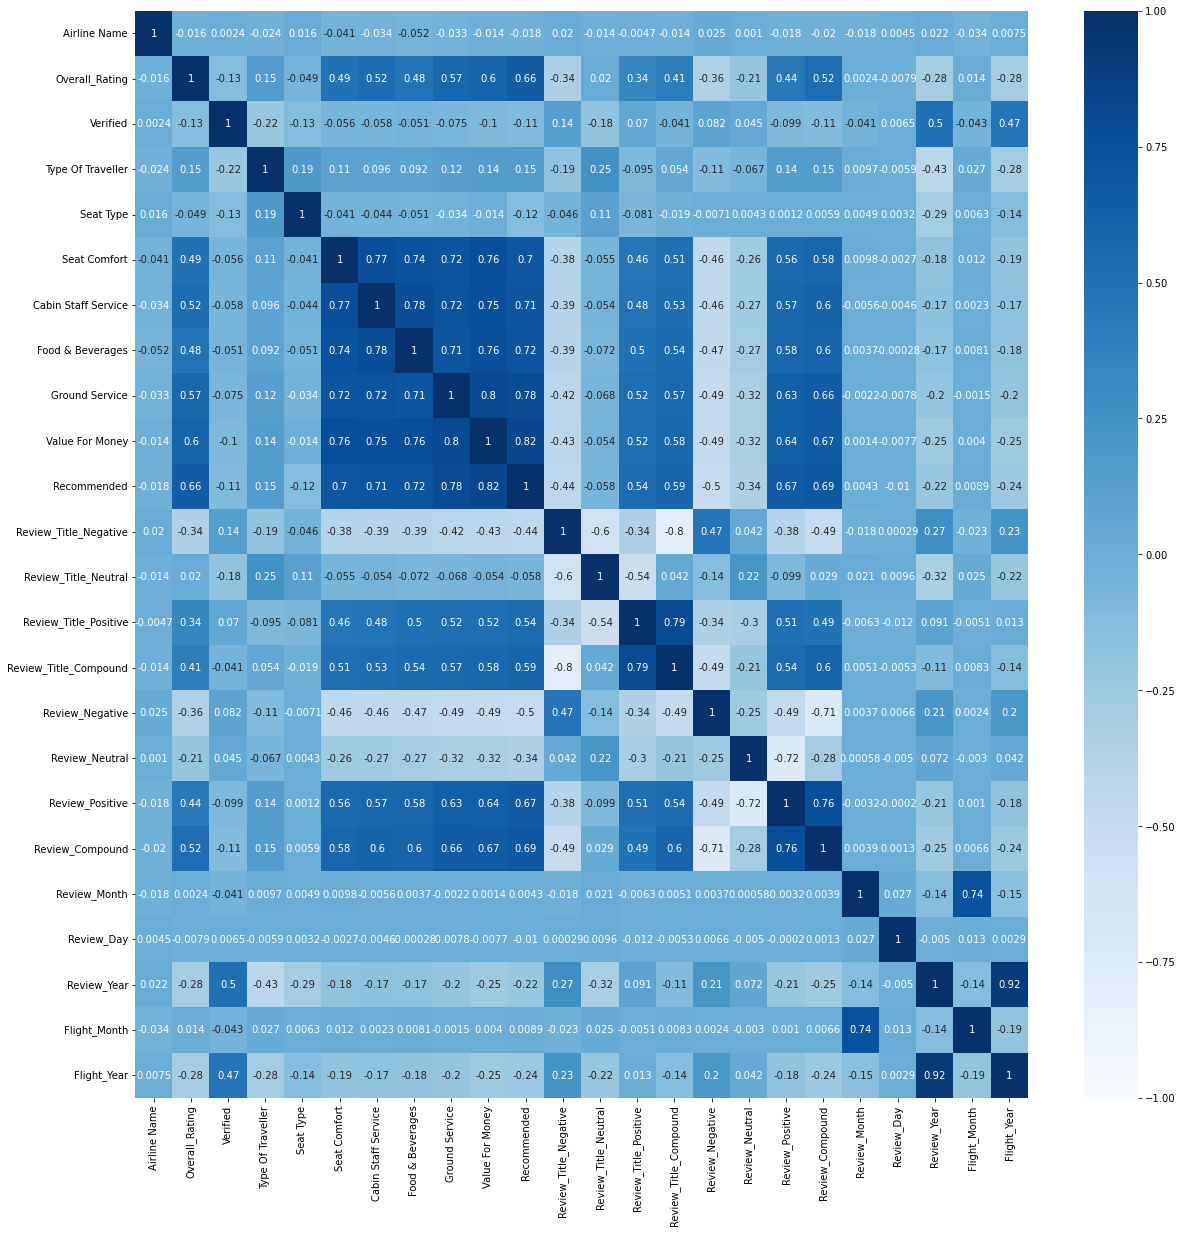

In [414]:
plt.figure(figsize=(20,20))
sns.heatmap(airlines_data.corr(), annot=True, vmin = -1, vmax = 1, cmap = 'Blues')

<strong>Inferences</strong>
<ul>
    <li>There are multiple columns that show high collinearity with the dependent variable. These variables must be kept.</li>
    <li>There appears to be high multicollinearity in the dataset. We will remove highly multicollinear variables using variance inflation factor.</li>

In [425]:
cols = airlines_data.columns
vif = []
for i in range(len(cols)):
    temp = variance_inflation_factor(airlines_data.values,i)
    vif.append(temp)
    
vif_df = pd.DataFrame(vif,index=cols, columns=['Vif_Score'])
vif_df.sort_values(by = 'Vif_Score',ascending=False)

,Vif_Score
Flight_Year,4.618608e+06
Review_Year,3.162761e+06
Review_Neutral,4.984721e+05
Review_Positive,1.463538e+04
Review_Title_Neutral,1.229909e+04
Review_Negative,9.262230e+03
Review_Title_Negative,2.099004e+03
Review_Title_Positive,1.644882e+03
Review_Title_Compound,1.872154e+01
Value For Money,1.662742e+01


As visible here, there are highly multicollinear columns. We drop alternate ones that have a logical connection with other highly multicollinear columns and check if the VIF decreases.

In [426]:
airlines_data.drop(columns=['Flight_Year','Review_Neutral','Review_Title_Neutral'], inplace=True)

In [427]:
cols = airlines_data.columns
vif = []
for i in range(len(cols)):
    temp = variance_inflation_factor(airlines_data.values,i)
    vif.append(temp)
    
vif_df = pd.DataFrame(vif,index=cols, columns=['Vif_Score'])
vif_df.sort_values(by = 'Vif_Score',ascending=False)

,Vif_Score
Review_Year,34.092582
Review_Title_Compound,18.711731
Value For Money,16.565646
Cabin Staff Service,15.463717
Seat Comfort,14.218453
Food & Beverages,13.279019
Ground Service,12.491240
Review_Title_Negative,11.945341
Flight_Month,11.114948
Review_Title_Positive,10.232223


As visible, we have now reduced the amount of multicollinearity significantly. We can now proceed with balancing the dataset.

<h3>Balancing the Dataset.</h3>

<AxesSubplot:xlabel='Recommended', ylabel='count'>

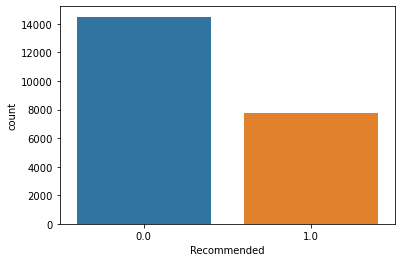

In [431]:
sns.countplot(airlines_data['Recommended'])

As visible, the data is imbalanced. We will now balance the data using SMOTE (Synthetic Minority Oversampling Technique). This uses the Eculidean Distance metric to create syntetic data in the minority class.

In [433]:
X_temp = airlines_data.drop(columns = 'Recommended')
y_temp  = airlines_data['Recommended']

In [434]:
sm = SMOTE()
X,y = sm.fit_resample(X,y)

<AxesSubplot:xlabel='Recommended', ylabel='count'>

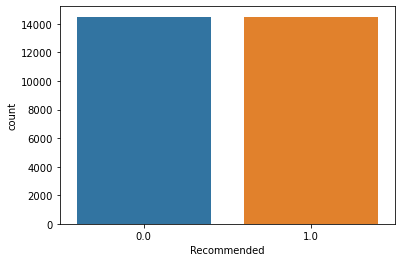

In [435]:
sns.countplot(y)

In [436]:
X.shape

(29012, 20)

Our data has not been balanced using Over-Sampling. This gives us more freedom to now build our model pipeline.

______________________________________________________________________________________________________________________________

<h1>Model Building</h1>

In [440]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, stratify=y, test_size=0.3)

In [441]:
print('X Train Shape: ', X_train.shape)
print('X Test Shape: ', X_test.shape)
print('Y Train Shape: ', Y_train.shape)
print('Y Test Shape: ', Y_test.shape)

X Train Shape:  (20308, 20)
X Test Shape:  (8704, 20)
Y Train Shape:  (20308,)
Y Test Shape:  (8704,)


In [449]:
rf= RFE(estimator=DecisionTreeClassifier())
pd.DataFrame(rf.fit_transform(X = X_train, y = Y_train)).shape

(20308, 10)

In [478]:
rf.get_feature_names_out()

array(['Airline Name', 'Overall_Rating', 'Seat Type',
       'Cabin Staff Service', 'Ground Service', 'Value For Money',
       'Review_Title_Compound', 'Review_Negative', 'Review_Positive',
       'Review_Compound'], dtype=object)

Using recursive feature elimination, a combination of backward and forwards feature elimination, we have finalized on the 10 most important features using the Decision Tree Classifier as the Base.

In [479]:
def plot_roc(model):
    from sklearn.metrics import roc_auc_score
    y_pred_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.plot([0, 1], [0, 1],'r--')
    plt.title('ROC curve for Admission Prediction Classifier', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
    plt.text(x = 0.82, y = 0.3, s = ('AUC Score:',round(roc_auc_score(Y_test, y_pred_prob),4)))
    plt.grid(True)

def plot_confusion_matrix(model):
    from matplotlib.colors import ListedColormap
    y_pred = model.predict(X_test)
    cm = confusion_matrix(Y_test, y_pred)
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.show()   
    
def model_eval(model):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    print('Accuracy in predicting the Training Data:',accuracy_score(Y_train,y_train_pred))
    print('Test Data Accuracy Score:',accuracy_score(Y_test,y_test_pred))
    print('\t   Training Data Classification Performance Metrics\n',classification_report(Y_train,y_train_pred))
    print('\t    Test Data Classification Performance Metrics\n',classification_report(Y_test , y_test_pred))
    plot_confusion_matrix(model)
    plot_roc(model)

In [480]:
xgb = XGBClassifier(n_estimators = 3)
pipline = make_pipeline(rf, xgb)

In [481]:
pipline.fit(X,y)

Pipeline(steps=[('rfe', RFE(estimator=DecisionTreeClassifier())),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=6, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=3, n_jobs=0, num_parallel_tree=1,
                               predictor='auto', random_state=0, reg_alpha=0,
                               reg_lambda=1, ...))])

Accuracy in predicting the Training Data: 0.9736064605081741
Test Data Accuracy Score: 0.9721966911764706
	   Training Data Classification Performance Metrics
               precision    recall  f1-score   support

         0.0       0.97      0.98      0.97     10154
         1.0       0.98      0.97      0.97     10154

    accuracy                           0.97     20308
   macro avg       0.97      0.97      0.97     20308
weighted avg       0.97      0.97      0.97     20308

	    Test Data Classification Performance Metrics
               precision    recall  f1-score   support

         0.0       0.97      0.98      0.97      4352
         1.0       0.98      0.97      0.97      4352

    accuracy                           0.97      8704
   macro avg       0.97      0.97      0.97      8704
weighted avg       0.97      0.97      0.97      8704



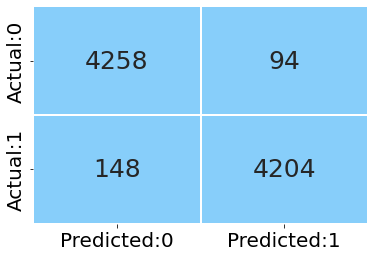

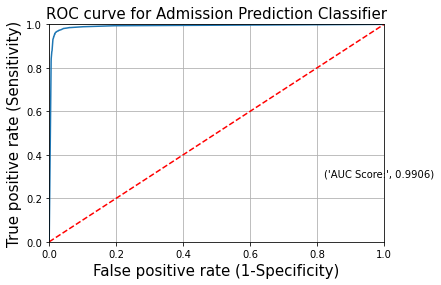

In [482]:
model_eval(pipline)

In [483]:
roc_auc_score(Y_test, pipline.predict(X_test))

0.9721966911764705

<h1>Conclusion</h1>


Our models seems to be performing extremely well. We have an overall Test Ruc_Auc_score of 97%. This means we have a good balance between TPR and FPR, which is great if this model goes into production as both False Positives and False Negatives are extremely important for this model.

It also appears that extensive data cleaning has indeed helped in making sure that the data is atomic and thus helped in building our model quickly and efficiently.

Due to our main metric (Roc_Auc_Score) being satisfied, we can now positively take this model to production.